In [3]:
from pydantic import BaseModel
from langgraph.graph import StateGraph,START,END
from typing import Annotated
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage
from langchain_groq import ChatGroq
from langchain_core.messages import AnyMessage
import os
from dotenv import load_dotenv
load_dotenv()

class State(BaseModel):
    messages:Annotated[list[AnyMessage],add_messages]

In [4]:
### this is tool for subtract two numbers

def sub(a:int,b:int) -> int:
    """Subtract two intiger, a is intiger and b is intiger
    output is also intiger"""
    return  a-b

In [5]:
### this is tool for additon two numbers

def add(a:int,b:int) -> int:
    """Add two intiger, a is intiger and b is intiger
    output is also intiger"""
    return  a+b

In [6]:
### this is tool for Mulitpication two numbers

def mult(a:int,b:int) -> int:
    """Multiply two intiger, a is intiger and b is intiger
    output is also intiger"""
    return  a*b

In [7]:
### this is tool for Divition two numbers

def divd(a:int,b:int) -> int:
    """ Divide two intiger, a is intiger and b is intiger
    output is also intiger"""
    return  a/b

In [8]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [9]:

## Creating LLM instance and binding above 4 tools to LLM
groq_llm = ChatGroq(model="qwen/qwen3-32b")
llm_with_tool = groq_llm.bind_tools([sub,add,mult,divd])


In [10]:
llm_with_tool.invoke([HumanMessage(content="what is 22-11*2?",name="Naveen")])


AIMessage(content='', additional_kwargs={'reasoning_content': "Okay, let me solve this step by step. The user is asking for 22 minus 11 multiplied by 2. First, I need to remember the order of operations, which is multiplication before subtraction. So, I should calculate 11 times 2 first. That gives 22. Then subtract that result from 22. So 22 minus 22 equals 0. Wait, but let me double-check. 11 multiplied by 2 is indeed 22. Subtracting 22 from 22 does give 0. Hmm, that seems right. But maybe I should verify using the functions provided. Let me break it down into the functions. The multiplication part is 11*2, so I can use the 'mult' function with a=11 and b=2. The result is 22. Then use the 'sub' function with a=22 and b=22. That gives 0. So the final answer should be 0.\n", 'tool_calls': [{'id': '6jnwktkg5', 'function': {'arguments': '{"a":11,"b":2}', 'name': 'mult'}, 'type': 'function'}, {'id': '9qeg5jpn9', 'function': {'arguments': '{"a":22,"b":22}', 'name': 'sub'}, 'type': 'functio

In [11]:
## Creating an Entery Node

def llm_tool(state:State):
    return {"messages":[llm_with_tool.invoke(state.messages)]}


In [12]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START,END

build_graph = StateGraph(State)

build_graph.add_node("llm_tool",llm_tool)
build_graph.add_edge(START,"llm_tool")
build_graph.add_edge("llm_tool",END)


In [13]:
graph = build_graph.compile()

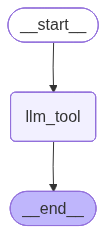

In [14]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
from pprint import PrettyPrinter
response = graph.invoke({"messages":"what is 100 plus 87?"})




In [17]:
for rep in response["messages"]:
    rep.pretty_print()

================================ Human Message =================================

what is 100 plus 87?
================================== Ai Message ==================================
Tool Calls:
  add (6vha8wzzz)
 Call ID: 6vha8wzzz
  Args:
    a: 100
    b: 87
